In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.colors as mcolors
from matplotlib.transforms import Bbox
from matplotlib.colors import to_rgba
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

# local imports
import utils as ut
import plotting as plt2

sc.settings.verbosity = 3  

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/sc_HSC/scanpy/hsc_landscape_umap.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 9.06 GB, difference +9.06 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2', 'nUMAP 1', 'nUMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_label_colors', 'cell_type_colors', 'cluster_str_colors', 'cluster_str_sizes', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'paga', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs['cell_label'].value_counts()

cell_label
Fibroblast                              26586
Reprogrammed Cells                       8574
Lineage Negative (CD34Pos/CD164Pos)      6343
Hematopoietic Stem Cell                  5798
Lineage Negative (CD34low/CD164high)     4265
Multipotent Progenitor                   1795
Megakaryocyte-Erythroid Progenitor        863
Multi-Lymphoid Progenitor                 123
Name: count, dtype: int64

In [4]:
adata.obs['cluster_str'].value_counts()

cluster_str
D1     7630
D2     6686
D3     6298
D4     5274
D5     4496
D6     4481
D7     3001
D8     2795
D9     2729
D10    2580
D11    1546
D12    1318
D13    1199
D14    1007
D15     873
D16     725
D17     704
D18     445
D19     318
D20     190
D21      52
Name: count, dtype: int64

# Plotting

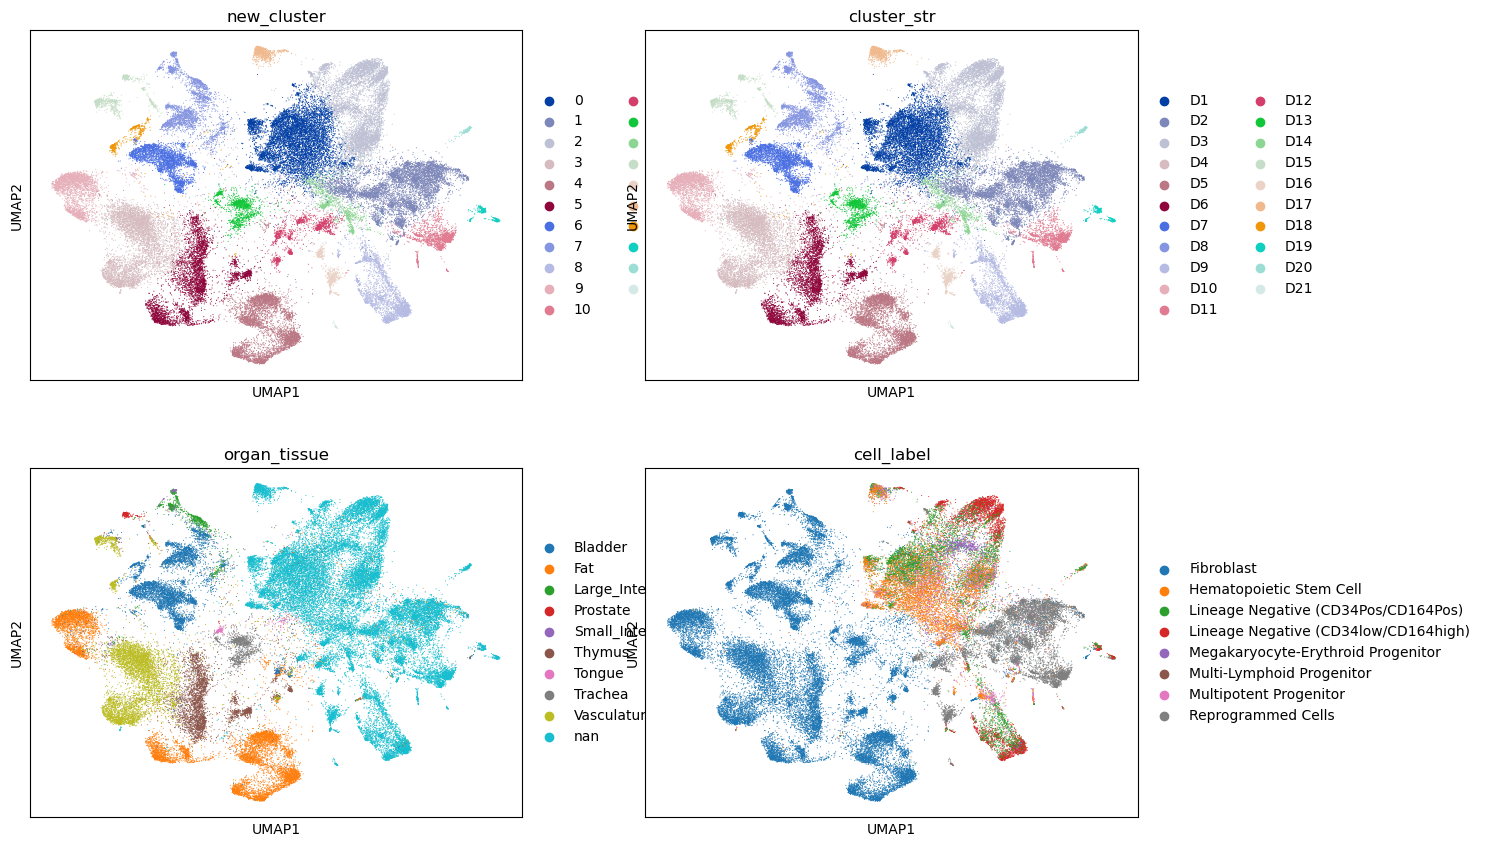

In [5]:
sc.pl.umap(
    adata,
    color=[
        'new_cluster',
        'cluster_str', 
        'organ_tissue', 
        'cell_label',
    ],
    ncols=2,
)

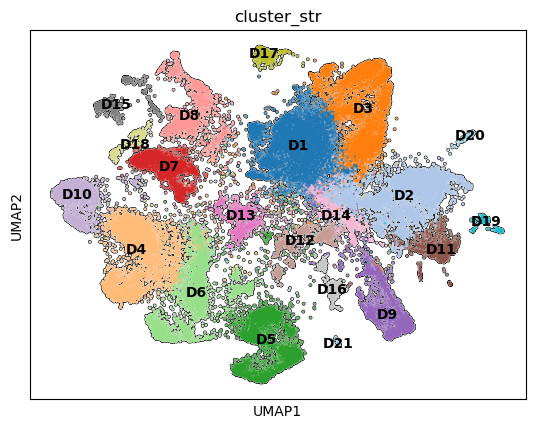

In [6]:
sc.pl.umap(
    adata,
    color='cluster_str',
    add_outline=True,
    legend_loc='on data',
    palette='tab20',
    s=10,
)

,n_counts,cell_type,dataset,organ_tissue,n_genes,new_cluster,cell_label,cluster_str,UMAP 1,UMAP 2,nUMAP 1,nUMAP 2
AAACCCAAGGTTACCT_iHSC,6558.0,iHSC,iHSC,nan,12480,1,Reprogrammed Cells,D2,8.989130,4.937538,30.569326,11.759235
AAACCCAAGTTGAAGT_iHSC,5488.0,iHSC,iHSC,nan,12413,1,Reprogrammed Cells,D2,7.586400,4.889987,22.905184,7.352222
AAACCCAAGTTGTCGT_iHSC,4330.0,iHSC,iHSC,nan,11906,10,Reprogrammed Cells,D11,8.027761,3.311177,41.547089,-0.618272
AAACCCACAGAAGCGT_iHSC,3442.0,iHSC,iHSC,nan,11861,10,Reprogrammed Cells,D11,8.584245,2.674468,39.634956,-2.427287
AAACCCACAGGAGGTT_iHSC,14427.0,iHSC,iHSC,nan,13436,1,Reprogrammed Cells,D2,9.509144,4.923519,26.070557,4.129996


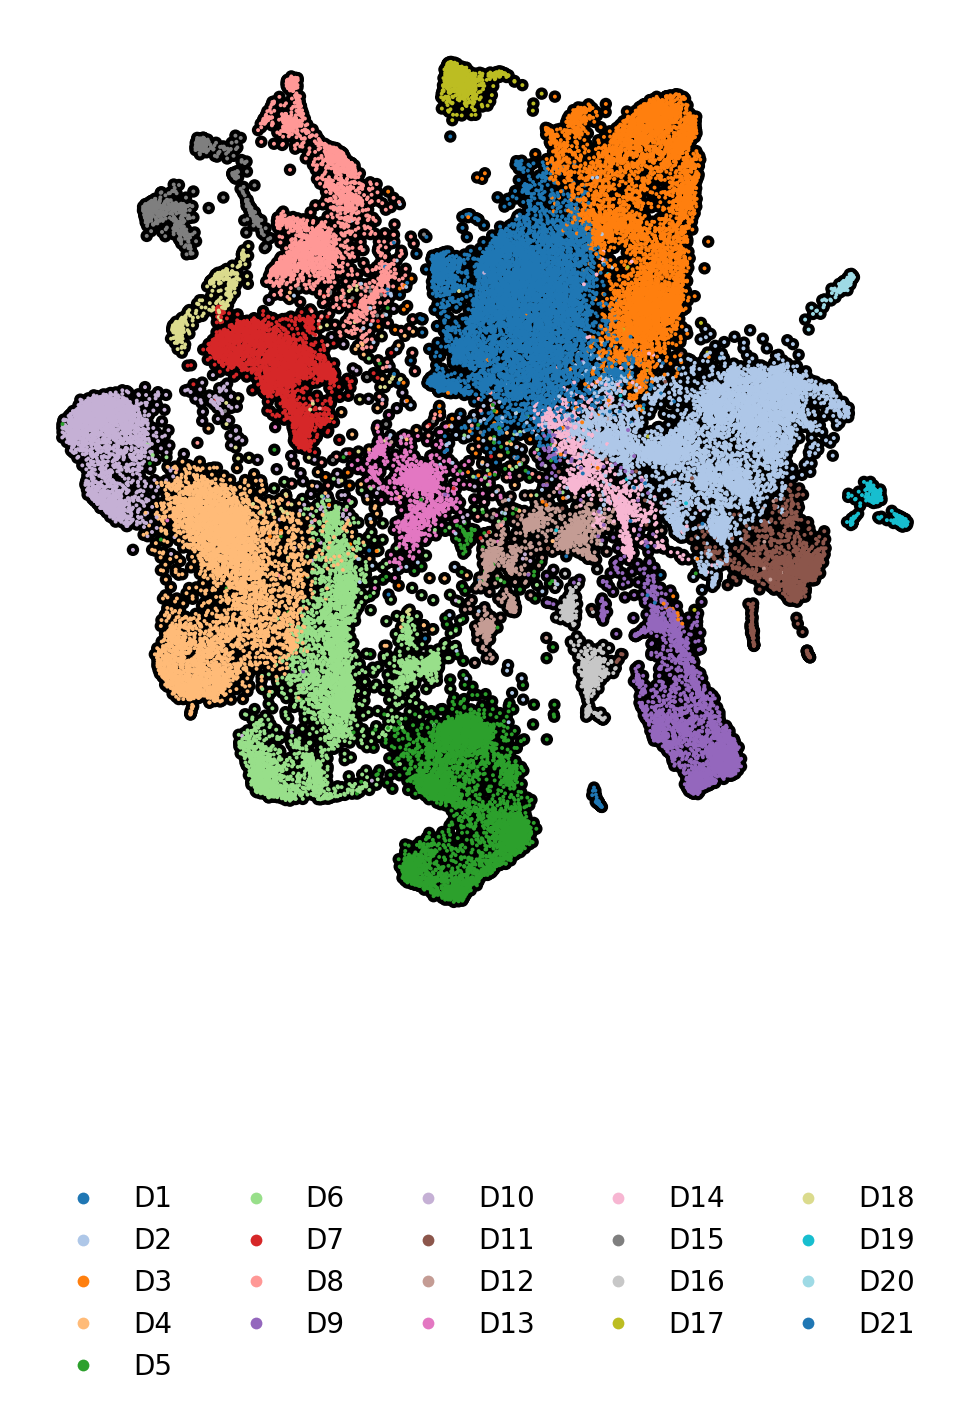

In [7]:
pdf = adata.obs.copy()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=20,
    c='k',
)

sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=2,
    hue='cluster_str',
    # hue_order=sorted(pdf['cluster_str'].unique())[::-1],
    palette='tab20',
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='lower center',
    title="",
    frameon=False,
    bbox_to_anchor=(0.5, -0.5),
    markerscale=3,
    ncol=5
)

pdf.head()

# Groups

In [8]:
sc.tl.embedding_density(
    adata, 
    basis='umap', 
    groupby='cell_label',
    key_added='cell_density',
)



computing density on 'umap'
--> added
    'cell_density', densities (adata.obs)
    'cell_density_params', parameter (adata.uns)


In [9]:
adata.obs.head()

,n_counts,cell_type,dataset,organ_tissue,n_genes,new_cluster,cell_label,cluster_str,UMAP 1,UMAP 2,nUMAP 1,nUMAP 2,cell_density
AAACCCAAGGTTACCT_iHSC,6558.0,iHSC,iHSC,nan,12480,1,Reprogrammed Cells,D2,8.989130,4.937538,30.569326,11.759235,0.691514
AAACCCAAGTTGAAGT_iHSC,5488.0,iHSC,iHSC,nan,12413,1,Reprogrammed Cells,D2,7.586400,4.889987,22.905184,7.352222,0.330035
AAACCCAAGTTGTCGT_iHSC,4330.0,iHSC,iHSC,nan,11906,10,Reprogrammed Cells,D11,8.027761,3.311177,41.547089,-0.618272,0.251578
AAACCCACAGAAGCGT_iHSC,3442.0,iHSC,iHSC,nan,11861,10,Reprogrammed Cells,D11,8.584245,2.674468,39.634956,-2.427287,0.548960
AAACCCACAGGAGGTT_iHSC,14427.0,iHSC,iHSC,nan,13436,1,Reprogrammed Cells,D2,9.509144,4.923519,26.070557,4.129996,0.356030


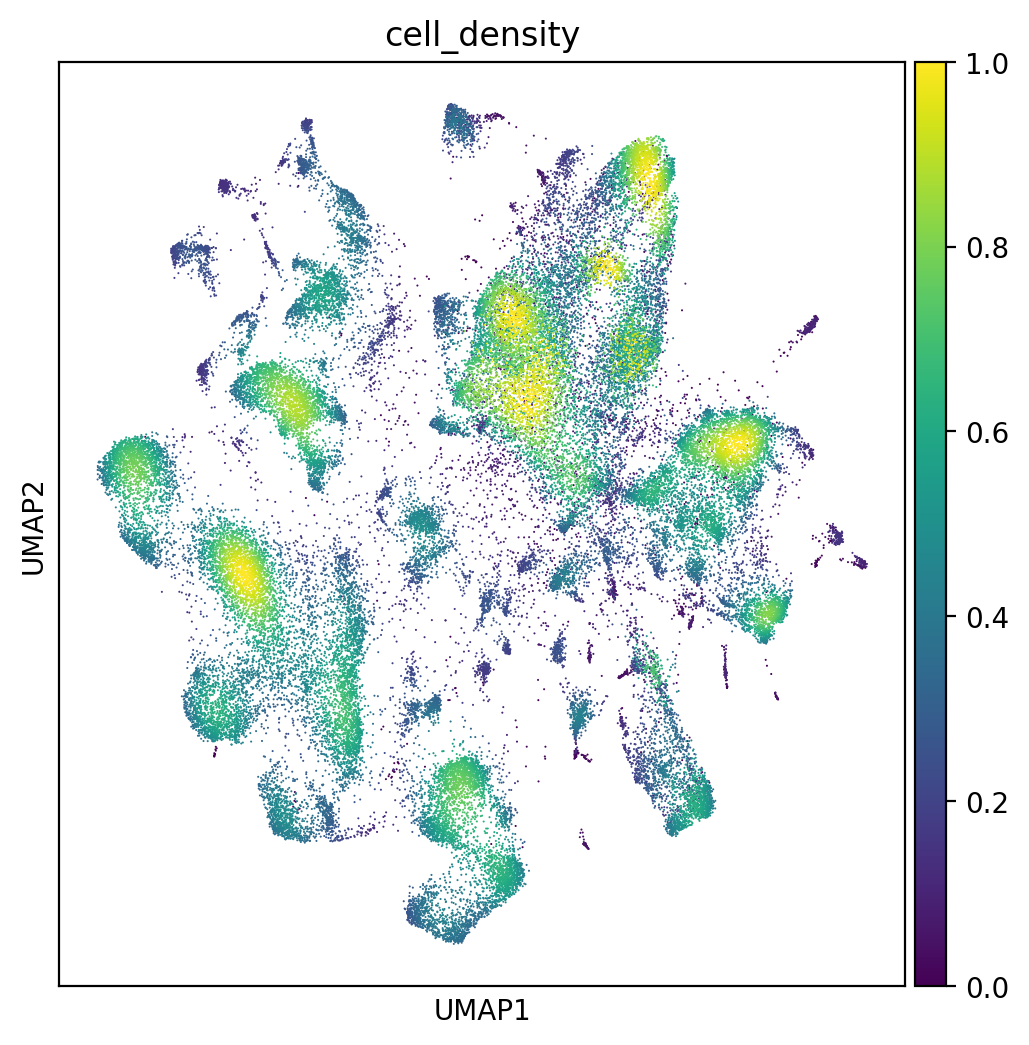

In [10]:
sc.pl.umap(
    adata,
    color=['cell_density']
)

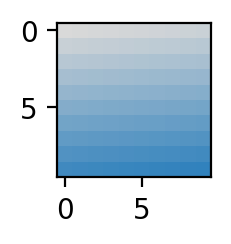

In [11]:
def hex_to_rgb(hex_code):
    """Converts a hex code to RGB."""
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) / 255 for i in (0, 2, 4))

def create_colormap(hex_color1, hex_color2):
    """Creates a colormap between two hex codes."""
    color1_rgb = hex_to_rgb(hex_color1)
    color2_rgb = hex_to_rgb(hex_color2)
    colors = [color1_rgb, color2_rgb]
    cmap_name = f'cmap_{hex_color1}_{hex_color2}'
    return LinearSegmentedColormap.from_list(cmap_name, colors)

# Define your start and end colors in hex format, and alpha values
start_color = '#D9D9D999'  
end_color = '#3182BD'  

# Create the colormap
cmap = create_colormap(start_color, end_color)
# Create data with a range of values
data = np.arange(0, 1, 0.01).reshape(10, 10)  # Values between 0 and 1

# Now you can use this cmap in your plots
plt.rcParams['figure.figsize'] = 1, 1
plt.imshow(data, cmap=cmap)


In [12]:
list(adata.obs['cell_label'].unique())

['Reprogrammed Cells',
 'Lineage Negative (CD34low/CD164high)',
 'Hematopoietic Stem Cell',
 'Lineage Negative (CD34Pos/CD164Pos)',
 'Multipotent Progenitor',
 'Multi-Lymphoid Progenitor',
 'Fibroblast',
 'Megakaryocyte-Erythroid Progenitor']

(-44.83672657012939, 56.74079837799072, -41.777954292297366, 50.86628360748291)

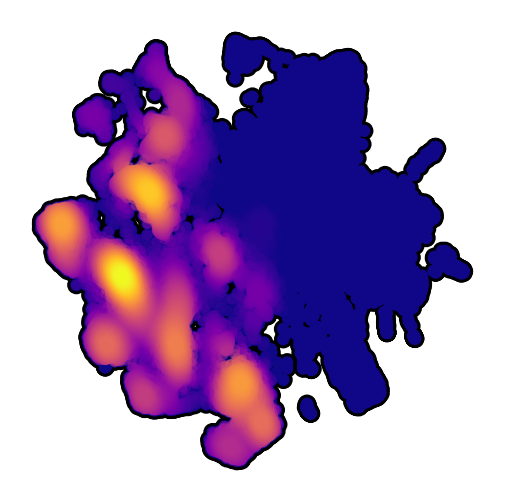

In [50]:
group = 'Fibroblast'
# group = 'Hematopoietic Stem Cell'
# group = 'Reprogrammed Cells'


# start_color = '#FFFFFF'  # light grey
# end_color = '#08569B'
# cmap = create_colormap(start_color, end_color)

pdf = adata.obs.copy()
pdf = pdf.sort_values(by='cell_density', ascending=True)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3


sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=45,
    c='k',
    zorder=0,
)

sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=20,
    # c='w',
    # c='#440154',
    c='#100788',
    zorder=1,
)

mask = (pdf['cell_label'] == group) & (pdf['cell_density'] > 0.05)

sns.scatterplot(
    data=pdf[mask],
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=15,
    alpha=0.5,
    palette='plasma',
    hue='cell_density',
    legend=False,
    zorder=2,
)


plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)


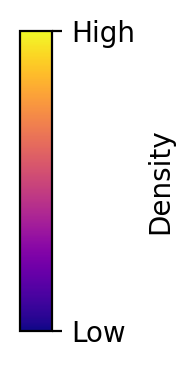

In [61]:
plt2.make_colorbar(cmap='plasma', tick_labels=['Low', 'High'], title='Density')

In [58]:
?plt2.make_colorbar

Signature:
plt2.make_colorbar(
    cmap='viridis',
    width=0.2,
    height=2.5,
    title='',
    orientation='vertical',
    tick_labels=[0, 1],
)
Docstring:
Creates and displays a standalone colorbar using Matplotlib.

Args:
    cmap (str or matplotlib.colors.Colormap): The colormap to use for the colorbar.
    width (float): The width of the colorbar figure in inches.
    height (float): The height of the colorbar figure in inches.
    title (str): The title to display above or next to the colorbar.
    orientation (str): The orientation of the colorbar ('vertical' or 'horizontal').
    tick_labels (list of str): The labels to display at each tick on the colorbar.

Returns:
    None: This function displays the colorbar directly using Matplotlib.

Raises:
    ValueError: If the `orientation` is not 'vertical' or 'horizontal'.
File:      ~/git_repositories/ONT-single-cell/notebooks/plotting.py
Type:      function

In [14]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Summary plots

In [ ]:
result = []

for cluster, group_df in adata.obs.groupby('cluster_str'):
    row = group_df['cell_label'].value_counts(normalize=True)
    row = row * 100
    row = row.to_dict()
    row['cluster'] = cluster
    result.append(row)
    
result = pd.DataFrame(result)
result['cluster'] = result['cluster'].str.replace("D", "B")
result = result.set_index('cluster')
result = result.sort_index(axis=1)
result.head()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8.5, 3

order = [
    'B4', 'B5', 'B6', 'B7', 'B8', 'B10', 'B13', 'B15','B18',
    'B12', 'B2', 'B11', 'B21', 'B16', 'B14',
    'B19', 'B20', 'B3', 'B1', 'B9', 'B17',
    
]

print(len(order))

[print(x) for x in result.index if not x in order]

result_sorted = result.loc[order]

result_sorted.plot(
    kind='bar', 
    stacked=True,
    ec='k',
    cmap='tab20c',
)

plt.gca().tick_params(axis='x', rotation=0)

sns.move_legend(
    plt.gca(), 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.4),
    frameon=False,
    ncol=3,
)

plt.ylabel("% of Cells")
plt.xlabel("")

In [ ]:
break

# Load the original iHSC data annotations

In [ ]:
fpath = "/scratch/indikar_root/indikar1/shared_data/sc_HSC/scanpy/analysis.anndata.h5ad"

bdata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

df = bdata.obs.copy()
df.index = df.index + "_iHSC"

ihsc_cluster_map = dict(zip(df.index, df['cluster_str'].values))

df.head()

In [ ]:
adata.obs['cell_id'] = adata.obs.index.copy()
adata.obs['ihsc_cluster'] = adata.obs['cell_id'].map(ihsc_cluster_map)
adata.obs.head()

In [ ]:
result = []

for cluster, group_df in adata.obs.groupby('ihsc_cluster', sort=False):
    if cluster is None:
        continue
        
    row = group_df['cluster_str'].value_counts(normalize=True)
    row = row * 100
    row = row.to_dict()
    row['cluster'] = cluster
    result.append(row)
    
result = pd.DataFrame(result)
result = result.set_index('cluster')
result.columns = [x.replace("D", "B") for x in result.columns]

result = result.loc[:, (result.sum(axis=0) != 0)] # drop unrepresented clusters
result = result.sort_index(axis=0)


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 4

result.plot(
    kind='bar', 
    stacked=True,
    ec='k',
    cmap='tab20b',
)

plt.gca().tick_params(axis='x', rotation=0)

sns.move_legend(
    plt.gca(), 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.35),
    frameon=False,
    ncol=4,
)

plt.ylabel("% of Cells")
plt.xlabel("")

In [ ]:
result = []

for cluster, group_df in adata.obs.groupby('cluster_str', sort=False):
    if cluster is None:
        continue
        
    row = group_df['ihsc_cluster'].value_counts()
    # row = row * 100
    row = row.to_dict()
    row['cluster'] = cluster.replace('D', 'B')
    result.append(row)
    
result = pd.DataFrame(result).fillna(0.0)
result = result.set_index('cluster')
result = result.loc[(result.sum(axis=1) != 0), :] # drop unrepresented clusters
result = result.sort_index(axis=1)

keep = [
    'B2', 'B11', 'B12', 'B16', 'B14',
]

result = result.loc[keep]

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 4

result.plot(
    kind='bar', 
    stacked=True,
    ec='k',
    width=0.45,
)

plt.gca().tick_params(axis='x', rotation=0)

sns.move_legend(
    plt.gca(), 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.3),
    frameon=False,
    ncol=3,
)

plt.ylabel("Cells")
plt.xlabel("")

sns.despine()

In [ ]:
result.sum(axis=1)

# DEG

In [ ]:
sc.tl.rank_genes_groups(
    adata, 
    groupby="cluster_str",
    method='wilcoxon',
    corr_method='benjamini-hochberg',
    pts=True,
    layer='log_norm',
    key_added='cell_type',
)

deg = sc.get.rank_genes_groups_df(
    adata, 
    group=None,
    key='cell_type',
)

deg.head()

In [ ]:
sig = deg.copy()

fpath = "../resources/PanglaoDB_Augmented_2021.txt"
# pathway = 'Fibroblasts'
pathway = 'Hematopoietic Stem Cells'

features = ut.load_pathway(fpath)
query_genes = list(features[features[pathway]].index)

print(len(query_genes))

n_genes = 20
pvals_adj = 0.05
logfoldchanges = 0.0
group = 'D11'

sig = sig[sig['pvals_adj'] <= pvals_adj]
sig = sig[sig['logfoldchanges'] > logfoldchanges]
sig = sig[sig['group'] == group]
sig = sig[sig['names'].isin(query_genes)]
sig = sig.sort_values(by='logfoldchanges', ascending=False)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = n_genes / 4, 2.5
sns.barplot(
    data=sig.head(n_genes),
    x='names',
    y='logfoldchanges',
    ec='k',
    width=0.5,
)

plt.ylabel("Fold Change (log2)")
plt.xlabel("")

plt.gca().tick_params(axis='x', rotation=90)

sns.despine()


In [ ]:
sig.head()

In [ ]:
sig = deg.copy()

pvals_adj = 0.05
logfoldchanges = 1.0
pct_nz_group = 0.50

sig = sig[sig['pvals_adj'] <= pvals_adj]
sig = sig[sig['logfoldchanges'] > logfoldchanges]
sig = sig[sig['pct_nz_group'] > pct_nz_group]


cluster_groups = {
    'fibroblast' : [4, 5, 6, 7,8,12, 13, 18],
    'HSC' : [1, 14, 17],
    'hematopoietic' : [3, 9, 19, 20],
    'reprogram' : [2, 11, 16, 21],
}

result = []

for k, v in cluster_groups.items():
    
    cluster_list = [f"D{x}" for x in v]
    
    sdf = sig[sig['group'].isin(cluster_list)]
    sdf = sdf[['names', 'logfoldchanges', 'pct_nz_group', 'pct_nz_reference']].groupby('names').mean()
    sdf = sdf.sort_values(by='logfoldchanges', ascending=False).reset_index()
    sdf['cell_group'] = k
    result.append(sdf)
    
result = pd.concat(result)
result.head(15)

In [ ]:
fpath = "../resources/PanglaoDB_Augmented_2021.txt"
# pathway = 'Fibroblasts'
pathway = 'Hematopoietic Stem Cells'

features = ut.load_pathway(fpath)
query_genes = list(features[features[pathway]].index)

print(len(query_genes))

In [ ]:
[x for x in features.columns if "stem" in x.lower()]

In [ ]:
cell_type = 'reprogram'
table = result.copy()
table = table[table['names'].isin(query_genes)]
table = table[table['cell_group'] == cell_type]
table.head(25)



In [ ]:
table = result.groupby('cell_group').head(5)
table = table[['cell_group', 'names', 'logfoldchanges', 'pct_nz_group']]

print(table.to_latex(float_format="%.2f", index=False))

In [ ]:
# 

In [ ]:
break

In [ ]:
plt2.make_colorbar(tick_labels=['Low', 'High'])

In [ ]:
def plot_gene_expression(exp_df, pdf, gene, cmap='viridis', ax=None, colorbar=True):
    """
    Plots gene expression on UMAP coordinates with color gradient.

    Args:
        exp_df: DataFrame containing gene expression data.
        pdf: DataFrame containing UMAP coordinates.
        gene: The gene to plot.
    """

    vector = exp_df[gene].values
    sorted_idx = np.argsort(vector)
    vmax = vector.max()
    vmin = vector.min()
    
    if ax is None:
        fig, ax = plt.subplots()

    # Base scatterplot (black dots)
    sns.scatterplot(
        data=pdf,
        x='nUMAP 1',
        y='nUMAP 2',
        ec='k',
        color='k',
        s=25,
        zorder=1,
        ax=ax,
    )

    # Expression-colored scatterplot
    sns.scatterplot(
        data=pdf.iloc[sorted_idx],
        x='nUMAP 1',
        y='nUMAP 2',
        ec='none',
        hue=vector[sorted_idx],
        palette=cmap,
        s=8,
        zorder=1,
        legend=False,
        ax=ax,
    )

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(gene)
    sns.despine(left=True, bottom=True)


    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.45)
    
    plt.axis('auto')

In [ ]:
gene_list = [
    # 'CD34',
    # 'GATA2',
    # 'GFI1B',
    # "PTPRC",
    # "THY1",
    # "MPL",
    # "FSTL1",
    # "ETV6",
    "TYROBP",
    "MPL",
    "PECAM1",
    # "MEIS1",
    # "COL14A1",
]

layer = 'log_norm'

pdf = adata.obs.copy()
exp_df = adata[:, gene_list].to_df(layer=layer)

for gene in gene_list:
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = 4, 3.5
    plot_gene_expression(exp_df, pdf, gene, cmap='viridis', colorbar=False)
    # break

In [ ]:
break

# Summary plots

In [ ]:
result = []

for cluster, group_df in adata.obs.groupby('cluster_str'):
    row = group_df['cell_label'].value_counts(normalize=True)
    row = row * 100
    row = row.to_dict()
    row['cluster'] = cluster
    result.append(row)
    
result = pd.DataFrame(result)
result = result.set_index('cluster')
result = result.sort_index(axis=1)
result.head()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8.5, 3

result.plot(
    kind='bar', 
    stacked=True,
    ec='k',
    cmap='tab20c',
)

plt.gca().tick_params(axis='x', rotation=0)

sns.move_legend(
    plt.gca(), 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.4),
    frameon=False,
    ncol=3,
)

plt.ylabel("% of Cells")
plt.xlabel("")

In [ ]:
break

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=20,
    c='k',
)

sns.scatterplot(
    data=pdf,
    x='nUMAP 1',
    y='nUMAP 2',
    ec='none',
    s=2,
    hue='cell_label',
    hue_order=sorted(pdf['cell_label'].unique())[::-1],
    # palette='Accent',
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='lower center',
    title="",
    frameon=False,
    bbox_to_anchor=(0.5, -0.5),
    markerscale=3,
    ncol=2
)

pdf.head()

In [ ]:
break

# TSNE

In [ ]:
sc.tl.tsne(
    adata,
    n_pcs=15,
)

sc.pl.tsne(
    adata,
    color=['cell_label'],
)

In [ ]:
break

# Nice plots

In [ ]:
reload(plt2)
len(plt2.CUSTOM_COLORS)

In [ ]:
pdf = adata.obs.copy()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=2,
    hue='cluster_str',
    palette=plt2.CUSTOM_COLORS,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(plt.gca(),
                loc='upper right',
                title="",
                frameon=False,
                bbox_to_anchor=(1.6, 1),
                markerscale=5,
                ncol=2
               )
pdf.head()

In [ ]:
pdf = adata.obs.copy()
pdf['cell_label'] = pdf['cell_label'].astype(str)
pdf = pdf.sort_values(by='cell_label',  ascending=False)
print(pdf['cell_label'].unique())

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


color_list = [
    '#377EB8', 
    '#4DAF4A',
    '#F781BF', 
    '#A65628', 
    '#984EA3', 
    '#FF7F00',
    '#FFFF33',
    '#66C2A5',
]


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=25,
    c='k',
)


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=4,
    hue='cell_label',
    palette=color_list,
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
# sns.despine()
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    frameon=False,
    bbox_to_anchor=(2.0, 1),
    markerscale=5,
    ncol=1,
)

pdf.head()

In [ ]:
# break

In [ ]:
def make_legend():
    """Creates a standalone legend for the cell types with their respective colors."""

    labels = [
        "iHSC",   # "Reprogrammed Cells",
        "MPP",   # "Multipotent Progenitor",
        "MLP",   # "Multi-Lymphoid Progenitor",
        "MEP",   # "Megakaryocyte-Erythroid Progenitor",
        "Lin- (CD34-/CD164+)",   # "Lineage Negative (CD34low/CD164high)",
        "Lin- (CD34+/CD164+)",   # "Lineage Negative (CD34Pos/CD164Pos)",
        "HSC",   # "Hematopoietic Stem Cell",
        "Fib",   # "Fibroblast",
    ]

    colors = [
      '#377EB8', '#4DAF4A', '#F781BF', '#A65628', '#984EA3', '#FF7F00', '#FFFF33', '#66C2A5']
    
    


    fig = plt.figure(figsize=(4, 2.5))  # Set the figure size appropriately
    ax = fig.add_subplot(111)

    for label, color in zip(labels, colors):
        ax.plot([], [], 
                marker='o', 
                linestyle='none', 
                color=color, label=label)

    ax.legend(
        frameon=False,
        loc='best',
        markerscale=1.5,
        ncols=4,
    )
    ax.axis('off')

    plt.show()
    
plt.rcParams['figure.dpi'] = 300
make_legend()

# Expression

In [ ]:
def plot_gene_expression(adata, gene, vmin=None, vmax=None, colorbar=True):
    """
    Plots gene expression on a UMAP embedding with a color gradient.

    Args:
      adata: An AnnData object containing gene expression and UMAP coordinates.
      gene: The gene to plot.
      vmin: The minimum value for the color scale (default 0).
      vmax: The maximum value for the color scale (default 2).
    """

    expression = adata[:, gene].to_df().values.ravel()
    order = np.argsort(expression)

    # Determine vmin and vmax if not provided
    if vmin is None:
        vmin = np.min(expression)
    else:
        vmin = max(np.min(expression), vmin)
        
    if vmax is None:
        vmax = np.max(expression)
    else:
        vmax = min(np.max(expression), vmax)
        

    fig, ax = plt.subplots()
    
    ax.scatter(
        adata.obsm['X_umap'][:, 0][order],
        adata.obsm['X_umap'][:, 1][order],
        c='k',
        s=25
    )

    scatter = ax.scatter(
        adata.obsm['X_umap'][:, 0][order],
        adata.obsm['X_umap'][:, 1][order],
        c=expression[order],
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        s=4,
    )

    plt.title(gene)
    plt.gca().set_aspect('auto')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel('UMAP 2')
    plt.xlabel('UMAP 1')

    plt.legend().remove()
    plt.axis(False)

    if colorbar:
        # Create colorbar
        norm = plt.Normalize(vmin, vmax)
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])  # This is necessary for the colorbar to work

        # Add colorbar to the plot
        cbar = ax.figure.colorbar(sm, ax=ax, shrink=0.35)
    
    
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 6
gene = 'PECAM1'
plot_gene_expression(adata, gene, vmax=5, vmin=0)

# HSC Genes

In [ ]:
fpath = "../resources/PanglaoDB_Augmented_2021.txt"
path_df = ut.load_pathway(fpath)

groupby = 'cell_label'
sort_by = 'Reprogrammed Cells'
path_name = 'Fibroblasts'

gene_list = list(path_df[path_df[path_name]].index)
gene_list = [x for x in gene_list if x in adata.var_names]
print(f"{len(gene_list)=}")

# extr5act genes and group
exp_df = adata[:, gene_list].to_df()
exp_df = exp_df.replace(0.0, pd.NA)
exp_df['group'] = adata.obs[groupby].values
exp_df = exp_df.groupby('group').mean().T

exp_df = exp_df.sort_values(by=sort_by, ascending=False)

exp_df.head(25)

# pang.head()

In [ ]:
sns.heatmap(
    exp_df.corr(),
    square=True,
    lw=1,
    cbar_kws={'shrink' : 0.5, 'label' : 'Correlation'},
    annot=True,  # Add annotations
    fmt=".2f"  # Format annotations with two decimals
)

plt.ylabel("")
plt.xlabel("")

In [ ]:
break